# Preparation

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read the Data

In [3]:
df =  pd.read_csv("https://raw.githubusercontent.com/nzlul03/improving_ML_performance/main/loan_approval.csv")

In [4]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE


In [5]:
df.shape

(621, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  property_type       620 non-null    object 
 15  loan_status         621 non-null    object 
dtypes: float

# Data Cleansing

## Handling Duplicate

In [7]:
df[df.duplicated(keep=False)]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
89,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
278,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
307,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
362,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE
400,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT


In [8]:
df.shape

(621, 16)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(616, 16)

ada sekitar 10 data yang duplicate

In [11]:
# re-check again

df[df.duplicated(keep=False)]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status


In [12]:
df[df[['loan_id']].duplicated(keep=False)]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status


## Handling Missing Value

In [13]:
# create a new column to see the number of missing values
df['missing'] = df.isnull().sum(axis=1)

In [14]:
# sorted based on the data that has the largest number of missing values
df.sort_values('missing', ascending=False)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status,missing
603,LP002944,1985-02-23,6.285661e+11,Male,Yes,NaN,NaN,NaN,4000.0,0.0,180000,360,30,NaN,NaN,REJECT,5
416,LP002319,1988-04-23,NaN,Male,Yes,0,Graduate,NaN,6256.0,0.0,160000,360,30,NaN,house,APPROVE,3
606,LP002949,NaN,6.285632e+11,Female,No,3+,Graduate,NaN,416.0,41667.0,350000,180,15,NaN,house,REJECT,3
440,LP002393,NaN,6.285675e+11,Female,NaN,NaN,Graduate,No,10047.0,0.0,110000,240,20,1.0,apartment,APPROVE,3
482,LP002530,NaN,NaN,NaN,Yes,2,Graduate,No,2873.0,1872.0,132000,360,30,0.0,apartment,REJECT,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,LP001776,1988-11-02,6.287707e+11,Female,No,0,Graduate,No,8333.0,0.0,280000,360,30,1.0,apartment,APPROVE,0
233,LP001770,1985-05-10,6.281391e+10,Male,No,0,Not Graduate,No,3189.0,2598.0,120000,360,30,1.0,studio,APPROVE,0
231,LP001765,1988-02-05,6.281177e+11,Male,Yes,1,Graduate,No,2491.0,2054.0,104000,360,30,1.0,apartment,APPROVE,0
230,LP001761,1983-02-08,6.281115e+11,Male,No,0,Graduate,Yes,6400.0,0.0,200000,360,30,1.0,studio,APPROVE,0


In [15]:
# filter (only data less than equal to 3 are included)
df = df[df['missing']<=3]

In [16]:
df.sort_values('missing', ascending=False)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status,missing
416,LP002319,1988-04-23,NaN,Male,Yes,0,Graduate,NaN,6256.0,0.0,160000,360,30,NaN,house,APPROVE,3
606,LP002949,NaN,6.285632e+11,Female,No,3+,Graduate,NaN,416.0,41667.0,350000,180,15,NaN,house,REJECT,3
440,LP002393,NaN,6.285675e+11,Female,NaN,NaN,Graduate,No,10047.0,0.0,110000,240,20,1.0,apartment,APPROVE,3
482,LP002530,NaN,NaN,NaN,Yes,2,Graduate,No,2873.0,1872.0,132000,360,30,0.0,apartment,REJECT,3
105,LP001357,1989-05-26,6.281328e+11,Male,NaN,NaN,Graduate,No,NaN,754.0,160000,360,30,1.0,house,APPROVE,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,LP001776,1988-11-02,6.287707e+11,Female,No,0,Graduate,No,8333.0,0.0,280000,360,30,1.0,apartment,APPROVE,0
233,LP001770,1985-05-10,6.281391e+10,Male,No,0,Not Graduate,No,3189.0,2598.0,120000,360,30,1.0,studio,APPROVE,0
231,LP001765,1988-02-05,6.281177e+11,Male,Yes,1,Graduate,No,2491.0,2054.0,104000,360,30,1.0,apartment,APPROVE,0
230,LP001761,1983-02-08,6.281115e+11,Male,No,0,Graduate,Yes,6400.0,0.0,200000,360,30,1.0,studio,APPROVE,0


In [17]:
# drop column "missing"
df.drop("missing", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
# re-check the missing values (again)
df.isnull().sum()

loan_id                0
birth_date            49
phone_number          52
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       9
coapplicant_income     0
loan_amount            0
loan_term_month        0
loan_term_year         0
credit_history        50
property_type          0
loan_status            0
dtype: int64

#### Handling Missing Values : 
- `gender` : Fill nan value with "unknown"
- `married` : Fill nan value with the mode = "Yes"
- `dependents` : Fill nan value with '0' value
- `self_employed` : Fill nan value with the mode = "No"
- `applicant_income` : Fill nan value with the median = 3812.5
- `credit_history`: Fill nan value with the mode = 1.0

### Gender

In [19]:
df['gender'].value_counts()

Male      490
Female    112
Name: gender, dtype: int64

Fill nan value of `gender` with "unknown"

In [20]:
df['gender'] = df['gender'].fillna('unknown')

In [21]:
# re-check 'gender'
df['gender'].value_counts()

Male       490
Female     112
unknown     13
Name: gender, dtype: int64

### Married

In [22]:
df['married'].value_counts()

Yes    399
No     213
Name: married, dtype: int64

In [23]:
df['married'].mode()[0]

'Yes'

Fill nan value of `married` with the mode = "Yes"

In [24]:
df['married'].fillna(df['married'].mode()[0], inplace=True)

In [25]:
# re-check 'married'
df['married'].value_counts()

Yes    402
No     213
Name: married, dtype: int64

### Dependents

In [26]:
df['dependents'].value_counts()

0     345
1     103
2     101
3+     51
Name: dependents, dtype: int64

Fill nan value of `dependents` with '0' value

In [27]:
df['dependents'].fillna('0', inplace=True)

In [28]:
# re-check 'dependents'
df['dependents'].value_counts()

0     360
1     103
2     101
3+     51
Name: dependents, dtype: int64

### Self Employed

In [29]:
df['self_employed'].value_counts()

No     501
Yes     82
Name: self_employed, dtype: int64

In [30]:
df['self_employed'].mode()[0]

'No'

Fill nan value of `self_employed` with the mode = "No"

In [31]:
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

In [32]:
df['self_employed'].value_counts()

No     533
Yes     82
Name: self_employed, dtype: int64

### Applicant Income

In [33]:
df['applicant_income'].value_counts()

2500.0    9
6000.0    6
4583.0    6
2600.0    6
4166.0    5
         ..
3244.0    1
4408.0    1
3917.0    1
3992.0    1
7583.0    1
Name: applicant_income, Length: 500, dtype: int64

In [34]:
df['applicant_income'].median()

3812.5

Fill nan value of `applicant_income` with the median = 3812.5

In [35]:
df['applicant_income'].fillna(df['applicant_income'].median(), inplace=True)

### Credit History

In [36]:
df['credit_history'].value_counts()

1.0    476
0.0     89
Name: credit_history, dtype: int64

Fill nan value of `credit_history` with the mode = 1.0

In [37]:
df['credit_history'].fillna(1.0, inplace=True)

In [38]:
df['credit_history'].value_counts()

1.0    526
0.0     89
Name: credit_history, dtype: int64

### Rechecking the missing values

In [39]:
df.isnull().sum()

loan_id                0
birth_date            49
phone_number          52
gender                 0
married                0
dependents             0
education              0
self_employed          0
applicant_income       0
coapplicant_income     0
loan_amount            0
loan_term_month        0
loan_term_year         0
credit_history         0
property_type          0
loan_status            0
dtype: int64

## Handling Outlier Data

### Applicant Income, Coapplicant Income, Loan Amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


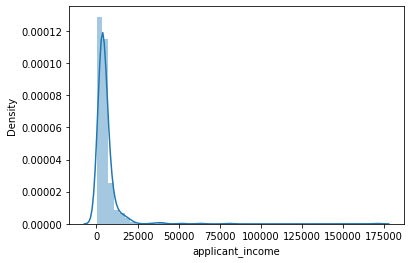

In [40]:
# Visualizing the 'applicant_income' value using distribution plot
sns.distplot(df['applicant_income'])

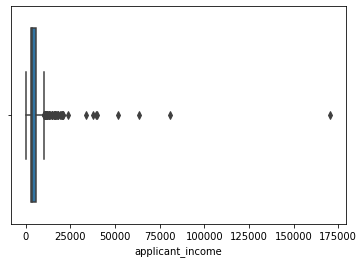

In [41]:
# Visualizing the 'applicant_income' using boxplot 
sns.boxplot(x='applicant_income', data=df)

In [42]:
from scipy import stats

In [43]:
df.shape

(615, 16)

Use z-score

In [44]:
filtered_entries = np.array([True] * len(df))
for col in ['applicant_income', 'coapplicant_income', 'loan_amount']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

In [45]:
df.shape

(590, 16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


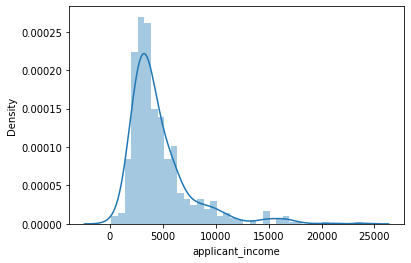

In [46]:
sns.distplot(df['applicant_income'])

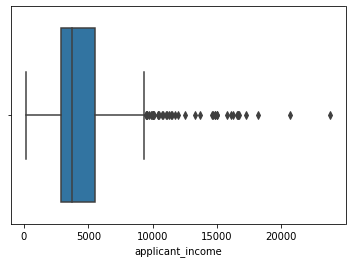

In [47]:
sns.boxplot(x='applicant_income', data=df)

# Feature Encoding and Preprocessing

- `gender` : label encoder
- `married` : label encoder
- `education` : label encoder
- `self_employed` : label encoder
- `dependents` : replace "+" value with " "
- `property_type` : convert categorical variable into dummy/indicator variables
- `loan_status` : one hot encode

## Gender, Married, Education, Self Employed

- label encoder for `gender`, `married`, `education`, `self_employed`.

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

In [49]:
for f in ["gender", "married", "education", "self_employed"]:
  df[f] = label_encoder.fit_transform(df[f])

In [50]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,0,0,0,0,0,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,1,1,3+,0,0,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,1,1,1,0,0,8072.0,240.0,253000,360,30,1.0,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,1,1,2,0,0,7583.0,0.0,187000,360,30,1.0,house,APPROVE


## Dependents

data preprocessing of `dependents` : replace "+" value with " "

In [51]:
df['dependents'] = df['dependents'].str.replace('+','').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [52]:
df['dependents'].value_counts()

0    350
2     98
1     96
3     46
Name: dependents, dtype: int64

In [53]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,0,0,0,0,0,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,1,1,3,0,0,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,1,1,1,0,0,8072.0,240.0,253000,360,30,1.0,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,1,1,2,0,0,7583.0,0.0,187000,360,30,1.0,house,APPROVE


## Property Type

convert categorical variable of `property_type` into dummy/indicator variables

In [54]:
property_type = pd.get_dummies(df['property_type'], prefix='type')

In [55]:
property_type

,type_apartment,type_house,type_studio
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
616,0,0,1
617,0,0,1
618,0,1,0
619,0,1,0


In [56]:
df = df.join(property_type)

In [57]:
df.head(5)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status,type_apartment,type_house,type_studio
0,LP001002,1977-05-15,6.281142e+11,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,house,APPROVE,0,1,0
1,LP001003,1979-08-24,6.287764e+11,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,studio,REJECT,0,0,1
2,LP001005,1991-03-28,6.281192e+11,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,house,APPROVE,0,1,0
3,LP001006,1980-06-02,6.285634e+10,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,house,APPROVE,0,1,0
4,LP001008,1989-05-19,6.281130e+11,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,house,APPROVE,0,1,0


## Loan Status

One hot encode `loan_status` if : 
- APPROVE = 1
- REJECT = 0

In [58]:
df['loan_status'] = df['loan_status'].apply(lambda x:1 if x=='APPROVE' else 0)

In [59]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status,type_apartment,type_house,type_studio
0,LP001002,1977-05-15,6.281142e+11,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,house,1,0,1,0
1,LP001003,1979-08-24,6.287764e+11,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,studio,0,0,0,1
2,LP001005,1991-03-28,6.281192e+11,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,house,1,0,1,0
3,LP001006,1980-06-02,6.285634e+10,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,house,1,0,1,0
4,LP001008,1989-05-19,6.281130e+11,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,house,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,0,0,0,0,0,2900.0,0.0,71000,360,30,1.0,studio,1,0,0,1
617,LP002979,1987-01-26,6.281165e+11,1,1,3,0,0,4106.0,0.0,40000,180,15,1.0,studio,1,0,0,1
618,LP002983,1982-03-08,6.281158e+11,1,1,1,0,0,8072.0,240.0,253000,360,30,1.0,house,1,0,1,0
619,LP002984,1986-12-05,6.281196e+11,1,1,2,0,0,7583.0,0.0,187000,360,30,1.0,house,1,0,1,0


# Train The Model

## Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df.columns

Index(['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history', 'property_type', 'loan_status',
       'type_apartment', 'type_house', 'type_studio'],
      dtype='object')

In [62]:
# define which features to be used
features = ['gender', 'married', 'dependents',
            'education', 'self_employed', 'applicant_income',
            'coapplicant_income', 'loan_amount', 'loan_term_month',
            'loan_term_year', 'credit_history', 'type_apartment',
            'type_house', 'type_studio']

### Define the features and the target label of the model


In [63]:
x = df[features]
y = df['loan_status']

In [64]:
x.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,type_apartment,type_house,type_studio
0,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,0,1,0
1,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,0,0,1
2,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,0,1,0
3,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,0,1,0
4,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,0,1,0


In [65]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 40)

In [67]:
x_train.shape

(472, 14)

In [68]:
x_test.shape

(118, 14)

## Train the Model

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 40)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=40)

## Evaluate the Model

In [70]:
y_pred = clf.predict(x_test)

In [71]:
probs = clf.predict_proba(x_test)[:,1]

In [72]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0])

In [73]:
probs

array([0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.])

In [74]:
from sklearn import metrics

In [75]:
# AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC: " + str(round(auc*100,2))+'%')

AUC: 55.93%


In [76]:
# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: " + str(round(accuracy*100,2))+'%')

Accuracy: 61.86%


Log the performance

In [77]:
performance_log = pd.DataFrame(columns=['experiment','AUC','Accuracy'])

perf = {
    'experiment' : 'Model DT (Initial Model)',
    'AUC' : str(round(auc*100,2))+'%',
    'Accuracy' : str(round(accuracy*100,2))+'%'
}

performance_log = performance_log.append(perf, ignore_index=True)

In [78]:
performance_log

,experiment,AUC,Accuracy
0,Model DT (Initial Model),55.93%,61.86%


# Feature Engineering (Again) 

### Phone Number 

In [79]:
df['phone_number']

0      6.281142e+11
1      6.287764e+11
2      6.281192e+11
3      6.285634e+10
4      6.281130e+11
           ...     
616    6.285650e+11
617    6.281165e+11
618    6.281158e+11
619    6.281196e+11
620    6.281396e+11
Name: phone_number, Length: 590, dtype: float64

Fill nan value of `phone_number` with 0

In [80]:
df['phone_number'].fillna(0, inplace=True)

Data preprocessing `phone_number`

In [81]:
df['phone_number_prefix'] = df['phone_number'].apply(lambda x: str(int(x))[:5])

In [82]:
df[['phone_number', 'phone_number_prefix']]

,phone_number,phone_number_prefix
0,6.281142e+11,62811
1,6.287764e+11,62877
2,6.281192e+11,62811
3,6.285634e+10,62856
4,6.281130e+11,62811
...,...,...
616,6.285650e+11,62856
617,6.281165e+11,62811
618,6.281158e+11,62811
619,6.281196e+11,62811


In [83]:
df.groupby('phone_number_prefix')['loan_id'].count()

phone_number_prefix
0         49
62811    181
62813    102
62852     36
62856     81
62857     73
62877     68
Name: loan_id, dtype: int64

In [84]:
phone_prefix_stats = df.groupby(['phone_number_prefix','loan_status'])['loan_id'].count().reset_index()
phone_prefix_stats

,phone_number_prefix,loan_status,loan_id
0,0,0,17
1,0,1,32
2,62811,0,25
3,62811,1,156
4,62813,0,43
5,62813,1,59
6,62852,0,17
7,62852,1,19
8,62856,0,31
9,62856,1,50


In [85]:
phone_prefix_stats = phone_prefix_stats.pivot(index = 'phone_number_prefix',
                                              columns = 'loan_status',
                                              values = 'loan_id').reset_index()

In [86]:
phone_prefix_stats['%_approved'] = phone_prefix_stats[1]/(phone_prefix_stats[0]+phone_prefix_stats[1])

In [87]:
phone_prefix_stats

loan_status,phone_number_prefix,0,1,%_approved
0,0,17,32,0.653061
1,62811,25,156,0.861878
2,62813,43,59,0.578431
3,62852,17,19,0.527778
4,62856,31,50,0.617284
5,62857,27,46,0.630137
6,62877,22,46,0.676471


In [88]:
phone_prefix_mapping = {
    '0' : 0,
    '62811' : 1,
    '62877' : 0,
    '62813' : 0,
    '62852' : 0,
    '62856' : 0,
    '62857' : 0,
}

In [89]:
df['phone_type'] = df['phone_number_prefix'].apply(lambda x: 1 if x == '62811' else 0)

In [90]:
df[['phone_number_prefix', 'phone_type']]

,phone_number_prefix,phone_type
0,62811,1
1,62877,0
2,62811,1
3,62856,0
4,62811,1
...,...,...
616,62856,0
617,62811,1
618,62811,1
619,62811,1


### Age

In [91]:
from datetime import datetime

In [92]:
def get_age(birth_date):
  if pd.isna(birth_date):
    return None
  else:
    birth_dt = datetime.strptime(birth_date, '%Y-%M-%d')
    age = round((datetime.now() - birth_dt).days/365)
    return age

In [93]:
df['age'] = df['birth_date'].apply(lambda x: get_age(x))

In [94]:
df[['birth_date','age']]

,birth_date,age
0,1977-05-15,46.0
1,1979-08-24,44.0
2,1991-03-28,31.0
3,1980-06-02,43.0
4,1989-05-19,34.0
...,...,...
616,1976-03-25,47.0
617,1987-01-26,36.0
618,1982-03-08,41.0
619,1986-12-05,37.0


Fill the missing values of `age` with median.

In [95]:
df['age'].fillna(df['age'].median(), inplace=True)

In [96]:
df['age'].isnull().sum()

0

## Feature Selection

Correlation Matrix

<Figure size 720x576 with 0 Axes>

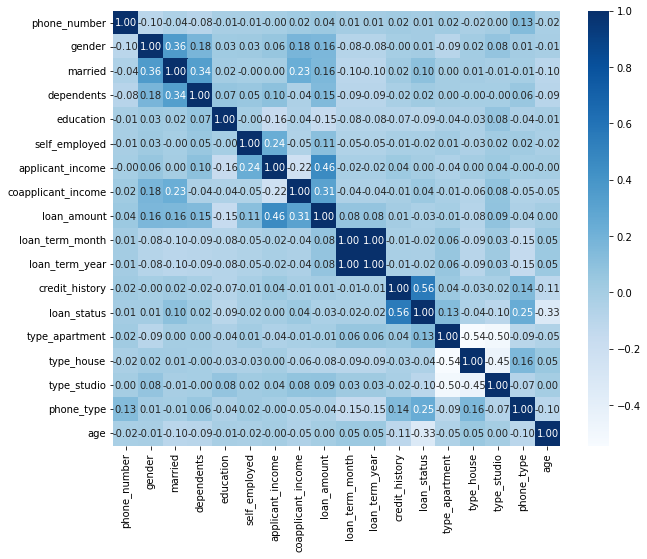

In [97]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),
            cmap = 'Blues',
            annot = True,
            fmt = '.2f')

We see that `loan_term_month` and `loan_term_year` is strongly correlated, thus we can remove one of them

In [98]:
df[['loan_term_month','loan_term_year']]

,loan_term_month,loan_term_year
0,360,30
1,360,30
2,360,30
3,360,30
4,360,30
...,...,...
616,360,30
617,180,15
618,360,30
619,360,30


## Retrain and Evaluate the Model

In [99]:
df.columns

Index(['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history', 'property_type', 'loan_status',
       'type_apartment', 'type_house', 'type_studio', 'phone_number_prefix',
       'phone_type', 'age'],
      dtype='object')

In [100]:
features = ['gender', 'married', 'dependents',
            'education', 'self_employed', 'applicant_income',
            'coapplicant_income', 'loan_amount', 'loan_term_month',
            'credit_history', 'type_apartment', 'type_house',
            'type_studio', 'phone_type', 'age']

            #removed loan_term_year

In [101]:
x = df[features]
y = df['loan_status']

In [102]:
x.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,credit_history,type_apartment,type_house,type_studio,phone_type,age
0,1,0,0,0,0,5849.0,0.0,100000,360,1.0,0,1,0,1,46.0
1,1,1,1,0,0,4583.0,1508.0,128000,360,1.0,0,0,1,0,44.0
2,1,1,0,0,1,3000.0,0.0,66000,360,1.0,0,1,0,1,31.0
3,1,1,0,1,0,2583.0,2358.0,120000,360,1.0,0,1,0,0,43.0
4,1,0,0,0,0,6000.0,0.0,141000,360,1.0,0,1,0,1,34.0


In [103]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 40)

In [105]:
x_train.shape

(472, 15)

In [106]:
x_test.shape

(118, 15)

In [107]:
y_train

189    1
455    0
247    1
67     1
609    1
      ..
461    1
169    0
7      0
227    0
339    1
Name: loan_status, Length: 472, dtype: int64

In [108]:
# Modelling
clf = DecisionTreeClassifier(random_state = 40)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=40)

In [109]:
y_pred = clf.predict(x_test)

In [110]:
probs = clf.predict_proba(x_test)[:,1]

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label = 1)
auc = metrics.auc(fpr, tpr)
print("AUC: " + str(round(auc*100,2)) + '%')

AUC: 64.07%


In [112]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: "+ str(round(auc*100,2)) + '%')

Accuracy: 64.07%


Log the performance

In [113]:
perf = {
    "experiment" : 'Model DT (Feature Engineering)',
    "AUC" : str(round(auc*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

In [114]:
performance_log

,experiment,AUC,Accuracy
0,Model DT (Initial Model),55.93%,61.86%
1,Model DT (Feature Engineering),64.07%,67.8%


### Oversampling with SMOTE

In [115]:
y_train[y_train==0].shape

(142,)

In [116]:
y_train[y_train==1].shape

(330,)

In [117]:
from imblearn import under_sampling, over_sampling

In [118]:
x_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE().fit_resample(x_train, y_train)

In [119]:
y_train_SMOTE[y_train_SMOTE==0].shape

(330,)

In [120]:
y_train_SMOTE[y_train_SMOTE==1].shape

(330,)

Check the performance

In [121]:
clf = DecisionTreeClassifier(random_state=40)

In [122]:
clf.fit(x_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier(random_state=40)

In [123]:
y_pred = clf.predict(x_test)
probs = clf.predict_proba(x_test)[:,1]

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC: "+str(round(auc*100,2))+'%')

AUC: 68.49%


In [125]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: "+str(round(accuracy*100,2))+'%')

Accuracy: 72.03%


Log the performance

In [126]:
perf = {
    "experiment": "Model DT (Oversampling with SMOTE)",
    "AUC": str(round(auc*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%'
}

performance_log = performance_log.append(perf, ignore_index=True)

In [127]:
performance_log

,experiment,AUC,Accuracy
0,Model DT (Initial Model),55.93%,61.86%
1,Model DT (Feature Engineering),64.07%,67.8%
2,Model DT (Oversampling with SMOTE),68.49%,72.03%


# Modelling Experiment

## Find the Best Model

Several models will be used for comparison:
- Logistic Regression
- K-Nearest Neighbors Classifier
- Support Vector Machine Classifier (SVC)
- Decision Tree 
- Random Forest
- Gradient Boosting
- AdaBoost
- Gaussian Naive Bayes
- Multinomial Naive Bayes
- Stochastic Gradient Classifier
- LGBM
- XGBoost
- MLP Classifier



In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [134]:
models = {
    "Logistic Regression"           : LogisticRegression(random_state = 40),
    "SVM"                           : SVC(probability=True, random_state = 40),
    "Decision Tree"                 : DecisionTreeClassifier(random_state = 40),
    "Random Forest"                 : RandomForestClassifier(random_state = 40),
    "Gradient Boosting"             : GradientBoostingClassifier(random_state = 40),
    "Ada Boost"                     : AdaBoostClassifier(random_state = 40),
    "K-Nearest Neighbors"           : KNeighborsClassifier(),
    "Gaussian Naive Bayes"          : GaussianNB(),
    "Multinomial Naive Bayes"       : MultinomialNB(),
    "LightGBM"                      : LGBMClassifier(random_state = 40),
    "XGBoost"                       : XGBClassifier(random_state = 40),
    "Multi Layer Perceptron"        : MLPClassifier(random_state = 40)
}

In [135]:
for model_name, clf in models.items():
  clf.fit(x_train_SMOTE, y_train_SMOTE)
  y_pred = clf.predict(x_test)
  probs = clf.predict_proba(x_test)[:,1]

  print("\n")
  print("Evaluate Model: {}".format(model_name))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
  auc = metrics.auc(fpr, tpr)
  print("AUC: "+ str(round(auc*100,2))+'%')

  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy: "+ str(round(accuracy*100,2))+'%')
  print("\n")

LogisticRegression(random_state=40)



Evaluate Model: Logistic Regression
AUC: 64.01%
Accuracy: 59.32%




SVC(probability=True, random_state=40)



Evaluate Model: SVM
AUC: 62.08%
Accuracy: 43.22%




DecisionTreeClassifier(random_state=40)



Evaluate Model: Decision Tree
AUC: 68.49%
Accuracy: 72.03%




RandomForestClassifier(random_state=40)



Evaluate Model: Random Forest
AUC: 78.72%
Accuracy: 79.66%




GradientBoostingClassifier(random_state=40)



Evaluate Model: Gradient Boosting
AUC: 79.39%
Accuracy: 78.81%




AdaBoostClassifier(random_state=40)



Evaluate Model: Ada Boost
AUC: 75.93%
Accuracy: 77.97%




KNeighborsClassifier()



Evaluate Model: K-Nearest Neighbors
AUC: 46.06%
Accuracy: 49.15%




GaussianNB()



Evaluate Model: Gaussian Naive Bayes
AUC: 64.9%
Accuracy: 64.41%




MultinomialNB()



Evaluate Model: Multinomial Naive Bayes
AUC: 42.31%
Accuracy: 41.53%




LGBMClassifier(random_state=40)



Evaluate Model: LightGBM
AUC: 79.71%
Accuracy: 79.66%




XGBClassifier(random_state=40)



Evaluate Model: XGBoost
AUC: 77.85%
Accuracy: 79.66%




MLPClassifier(random_state=40)



Evaluate Model: Multi Layer Perceptron
AUC: 45.99%
Accuracy: 31.36%




In [136]:
model_name = "Random Forest"
clf = RandomForestClassifier(random_state=40)
clf.fit(x_train_SMOTE, y_train_SMOTE)

y_pred = clf.predict(x_test)
probs = clf.predict_proba(x_test)[:,1]

print("\n")
print("Evaluate model: {}".format(model_name))

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC: " + str(round(auc*100,2))+'%')

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: "+str(round(accuracy*100,2))+'%')
print("\n")

RandomForestClassifier(random_state=40)



Evaluate model: Random Forest
AUC: 78.72%
Accuracy: 79.66%




In [137]:
perf = {
    "experiment": "Model RF (Oversampling with SMOTE)",
    "AUC": str(round(auc*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

In [138]:
performance_log

,experiment,AUC,Accuracy
0,Model DT (Initial Model),55.93%,61.86%
1,Model DT (Feature Engineering),64.07%,67.8%
2,Model DT (Oversampling with SMOTE),68.49%,72.03%
3,Model RF (Oversampling with SMOTE),78.72%,79.66%


## Hyperparameter Tuning

In [139]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [140]:
clf = RandomForestClassifier(random_state=40)
# Check the hyperparameters
clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [141]:
# List of Hyperparameters will be tested
hyperparameters = dict(
                    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)], # Number of subtrees
                    max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]+[None], # Maximum depth of each subtree
                    min_samples_split = [2, 5, 10]     
                    )

In [142]:
hyperparameters

{'max_depth': [10, 43, 76, 110, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200]}

In [143]:
# Init
clf = RandomForestClassifier(random_state=40)
clf_tuned = RandomizedSearchCV(clf,
                               hyperparameters,
                               cv = 5,
                               random_state = 1234,
                               scoring = 'roc_auc',
                               n_iter = 20)
clf_tuned.fit(x_train_SMOTE, y_train_SMOTE)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
                   n_iter=20,
                   param_distributions={'max_depth': [10, 43, 76, 110, None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]},
                   random_state=1234, scoring='roc_auc')

In [144]:
# Predict and Evaluation
y_pred = clf_tuned.predict(x_test)
probs = clf_tuned.predict_proba(x_test)[:,1]

In [145]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

In [146]:
probs

array([0.73548387, 0.58709677, 0.65806452, 0.66451613, 0.9483871 ,
       0.41935484, 0.72903226, 0.02580645, 0.95483871, 0.95483871,
       0.71612903, 0.92258065, 0.50322581, 0.65806452, 0.72258065,
       0.59354839, 0.69032258, 0.91612903, 0.94193548, 0.89032258,
       0.69677419, 0.96129032, 0.97419355, 0.39354839, 0.98064516,
       0.72258065, 0.99354839, 0.89032258, 0.69032258, 0.67096774,
       0.08387097, 0.58709677, 0.9483871 , 0.89032258, 0.91612903,
       0.9483871 , 0.90322581, 0.41290323, 0.84516129, 0.92903226,
       0.82580645, 0.82580645, 0.12903226, 0.4       , 0.89677419,
       0.11612903, 0.7483871 , 0.29677419, 0.87741935, 0.43225806,
       0.89677419, 0.89032258, 0.92903226, 0.89677419, 0.47096774,
       0.21290323, 0.41290323, 0.89032258, 0.87741935, 0.70967742,
       0.99354839, 0.88387097, 0.61290323, 0.87096774, 0.55483871,
       0.90322581, 0.4516129 , 0.70967742, 0.43870968, 0.0516129 ,
       0.16129032, 0.56129032, 0.72258065, 0.61290323, 0.70322

In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC: " + str(round(auc*100,2))+'%')

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: "+str(round(accuracy*100,2))+'%')
print("\n")

AUC: 78.94%
Accuracy: 79.66%




Check the best hyper-parameters

In [148]:
for key, value in hyperparameters.items() :
  print(key + ':', clf_tuned.best_estimator_.get_params()[key])

n_estimators: 155
max_depth: 43
min_samples_split: 2


Log the Performance

In [149]:
perf = {
    "experiment": "Model RF (Hyper-Parameter Tuning)",
    "AUC": str(round(auc*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

In [150]:
performance_log

,experiment,AUC,Accuracy
0,Model DT (Initial Model),55.93%,61.86%
1,Model DT (Feature Engineering),64.07%,67.8%
2,Model DT (Oversampling with SMOTE),68.49%,72.03%
3,Model RF (Oversampling with SMOTE),78.72%,79.66%
4,Model RF (Hyper-Parameter Tuning),78.94%,79.66%


# Model Evaluation

## AUC

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

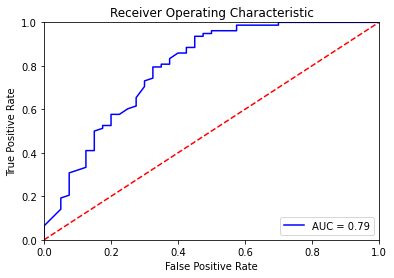

In [151]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Check Feature Importance

In [152]:
clf_tuned.best_estimator_.feature_importances_

array([0.01846122, 0.03230424, 0.02950344, 0.01448869, 0.00751718,
       0.0996141 , 0.06642272, 0.09383061, 0.02807169, 0.26006277,
       0.05028474, 0.02108249, 0.02352021, 0.0818101 , 0.17302582])

Text(0.5, 0, 'score')

Text(0, 0.5, 'feature')

Text(0.5, 1.0, 'feature importance score')

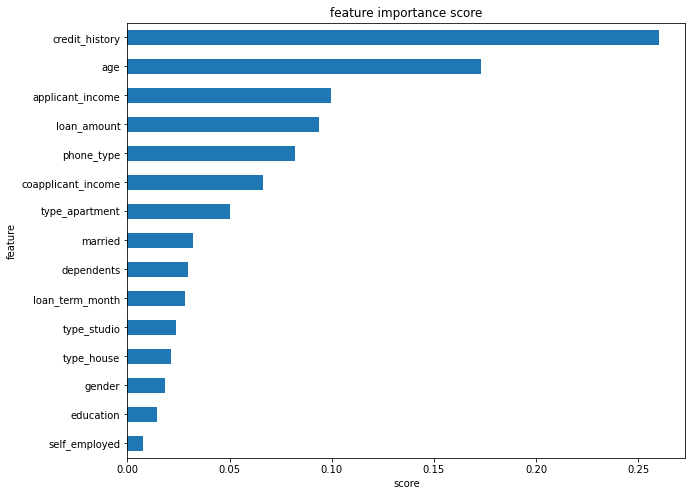

In [153]:
feat_importances = pd.Series(clf_tuned.best_estimator_.feature_importances_,
                             index = x.columns)
ax = feat_importances.nlargest(25).plot(kind='barh',
                                        figsize=(10, 8))

ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [154]:
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
